# Movie Data
You are a Data Scientist for a top movie studio. After a series of box office flops, the producers of your studio are starting to question their strategy and need some direction. You suggest a new approach - using data to determine what factors go into making a successful film. Luckily, you have a dataset of over 5000 films to mine for insights. Your producers ask you to spend some time analyzing the data and present a report detailing your findings, along with recommendations on how to revamp the studio’s strategy. 

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
movies_all = pd.read_csv('movie_data.csv')
#print(movies.columns)
#print(movies.info())
#movies

## Explore and Clean Dataset

In [3]:
#print(movies_all['title_year'].min())
#print(movies_all['title_year'].max())

In [8]:
# remove all movies from before the year 1996 in order to focus on the most recent data points
movies_recent = movies_all[movies_all['title_year']>=1996].copy().reset_index()

# transform budget and gross columns
movies_recent['budget_millions'] = round(movies_recent['budget'] / 1000000, 2)
movies_recent['gross_millions'] = round(movies_recent['gross'] / 1000000, 2)

# create revenue column
movies_recent['revenue_millions'] = movies_recent['gross_millions'] - movies_recent['budget_millions'] 

#movies_recent_gross_filter = movies_recent[movies_recent['gross_millions']>=100].copy()

## Analzye Genre Success

In [11]:
# create genre specific dataframes
genre_action = movies_recent[movies_recent['genres'].str.contains('Action')]
genre_adventure = movies_recent[movies_recent['genres'].str.contains('Adventure')]
genre_fantasy = movies_recent[movies_recent['genres'].str.contains('Fantasy')]
genre_thriller = movies_recent[movies_recent['genres'].str.contains('Thriller')]
genre_scifi = movies_recent[movies_recent['genres'].str.contains('Sci-Fi')]
genre_crime = movies_recent[movies_recent['genres'].str.contains('Crime')]
genre_comedy = movies_recent[movies_recent['genres'].str.contains('Comedy')]
genre_drama = movies_recent[movies_recent['genres'].str.contains('Drama')]
genre_doc = movies_recent[movies_recent['genres'].str.contains('Documentary')]
genre_romance = movies_recent[movies_recent['genres'].str.contains('Romance')]
genre_horror = movies_recent[movies_recent['genres'].str.contains('Horror')]

# create field for each genre in movies_recent dataframe
genre_lst = ['Action','Adventure','Fantasy','Thriller','Sci-Fi','Crime','Comedy','Drama','Documentary','Romance','Horror']

for x in genre_lst:
    movies_recent['genre_' + x.lower()] = ""
    
#movies_recent.columns

for x in range(len(movies_recent['genres'])):
    for y in genre_lst:
        if y in movies_recent['genres'][x]:
            movies_recent['genre_' + y.lower()][x] = y.lower()
        else:
            movies_recent['genre_' + y.lower()][x] = 'not ' + y.lower()

/Users/kristinkent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kristinkent/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Create df to analyze count by genre

In [22]:
genre_count = pd.DataFrame()
for x in genre_lst:
    x = movies_recent.groupby(['genre_' + x.lower()]).count()
    x = x.rename_axis('genre', axis= 0)
    genre_count = genre_count.append(x)

genre_count = genre_count[genre_count.index.str.contains("not")==False]

genre_count['index']

genre
action          921
adventure       722
fantasy         475
thriller       1176
sci-fi          476
crime           718
comedy         1587
drama          2119
documentary     115
romance         909
horror          438
Name: index, dtype: int64

### Create df to analyzing average outcome by genre

In [12]:
genre_avg = pd.DataFrame()
for x in genre_lst:
    x = movies_recent.groupby(['genre_' + x.lower()]).mean()
    x = x.rename_axis('genre', axis= 0)
    genre_avg = genre_avg.append(x)

genre_avg = genre_avg[genre_avg.index.str.contains("not")==False]

genre_avg.to_csv('genre_avg.csv')

#### Average gross by genre

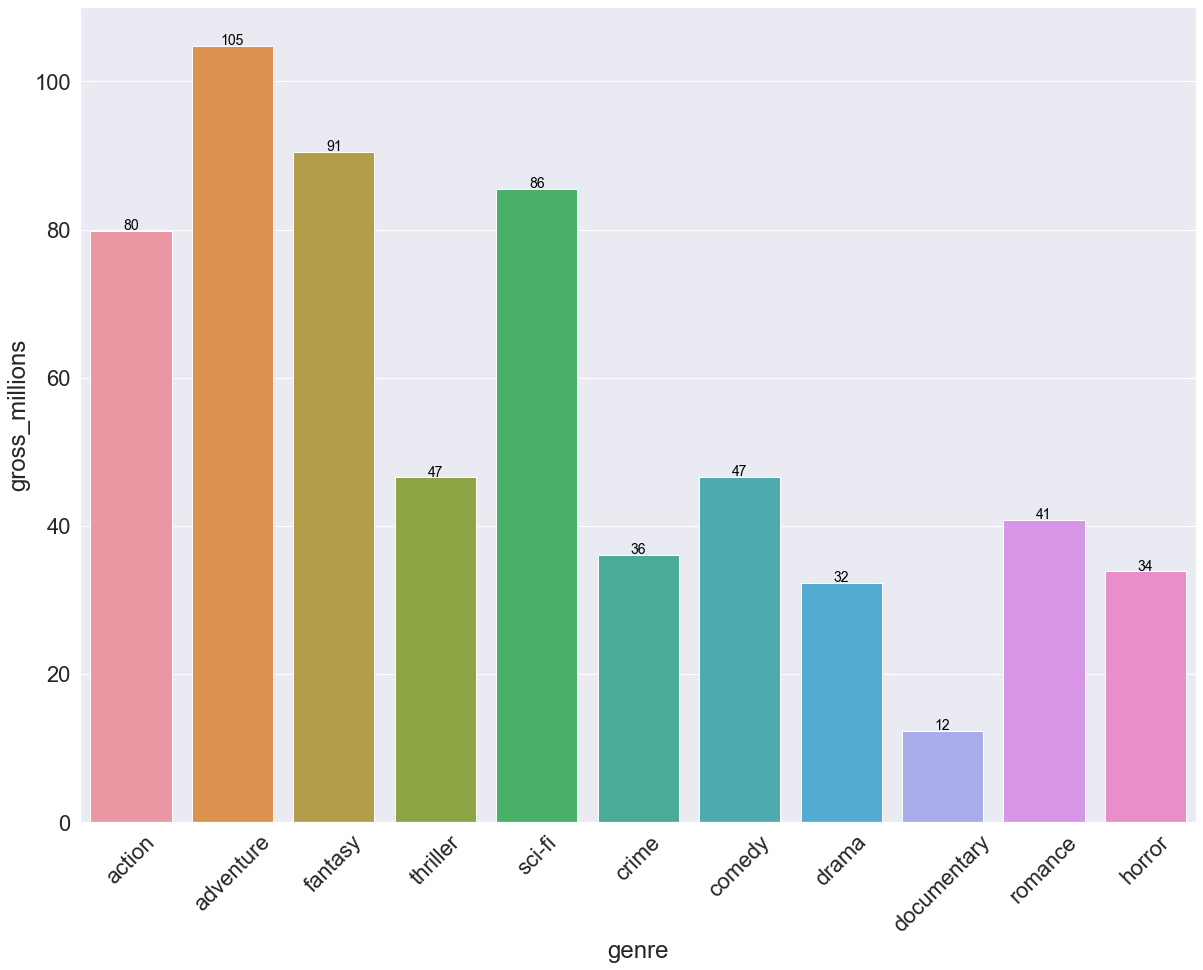

In [36]:
genre_avg_gross = sns.barplot(x= genre_avg.index, y="gross_millions", data=genre_avg)
genre_avg_gross.set_xticklabels(genre_avg_gross.get_xticklabels(),rotation=45)
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2)
plt.savefig('genre_avg_gross.png')

for p in genre_avg_gross.patches:
             genre_avg_gross.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                 textcoords='offset points')

# adventure, action, fantasy, and sci-fi have the highest average gross

#### Average budget by genre

In [14]:
#genre_avg_budget = sns.barplot(x= genre_avg.index, y="budget_millions", data=genre_avg)
#genre_avg_budget.set_xticklabels(genre_avg_budget.get_xticklabels(),rotation=45)

# adventure, action, fantasy, and sci-fi have the highest average budget

#### Average revenue by genre

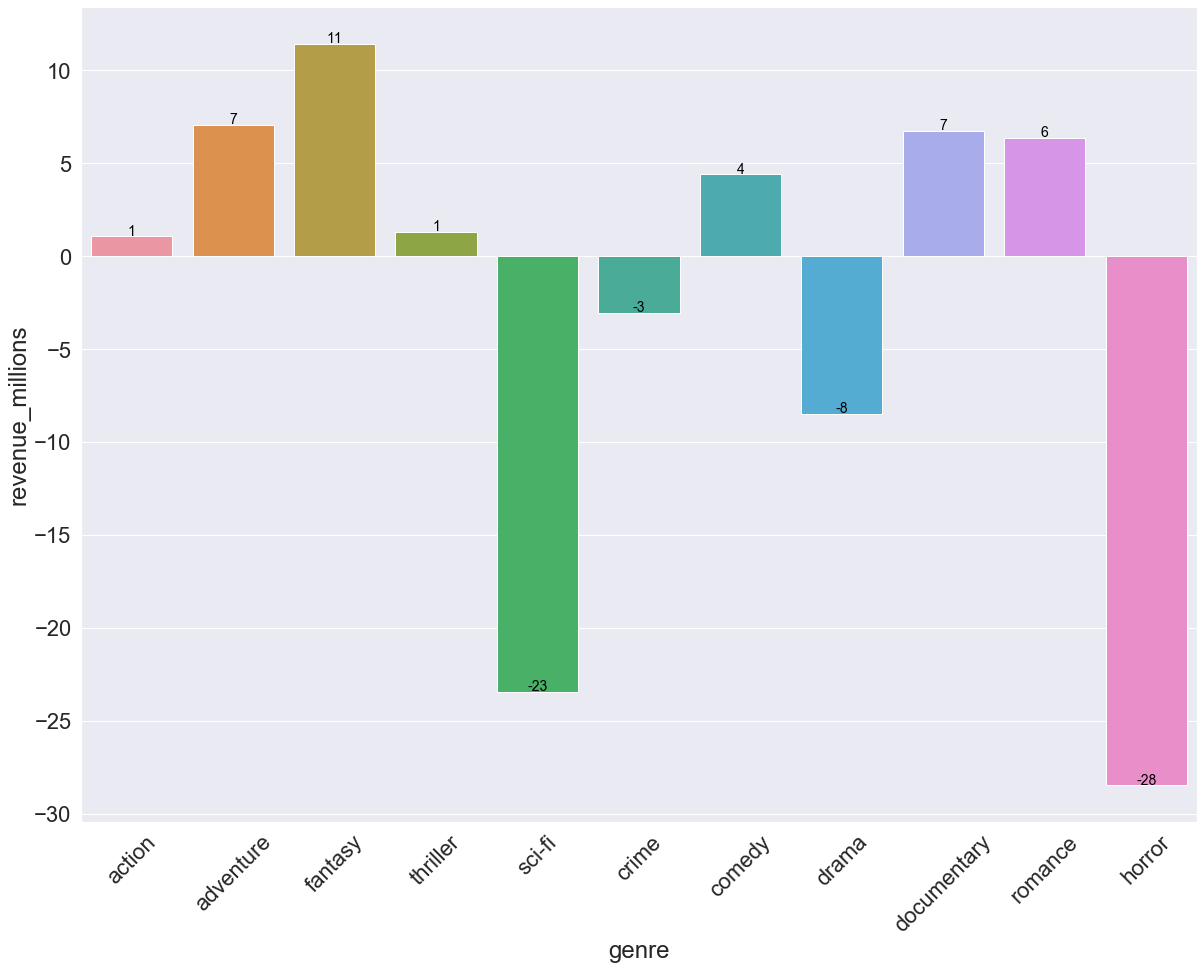

In [37]:
genre_avg_revenue = sns.barplot(x= genre_avg.index, y="revenue_millions", data=genre_avg)
genre_avg_revenue.set_xticklabels(genre_avg_revenue.get_xticklabels(),rotation=45)
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2)
plt.savefig('genre_avg_revenue.png')

for p in genre_avg_revenue.patches:
             genre_avg_revenue.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                 textcoords='offset points')

# sci-fi and horror movies lose money, on average; fantasy and adventure movies have the highest avg revenue

### Create df to analyze total outcome by genre

In [16]:
genre_sum = pd.DataFrame()
for x in genre_lst:
    x = movies_recent.groupby(['genre_' + x.lower()]).sum()
    x = x.rename_axis('genre', axis= 0)
    genre_sum = genre_sum.append(x)

genre_sum = genre_sum[genre_sum.index.str.contains("not")==False]
#genre_sum.to_csv('genre_sum.csv')

#### Total gross by genre

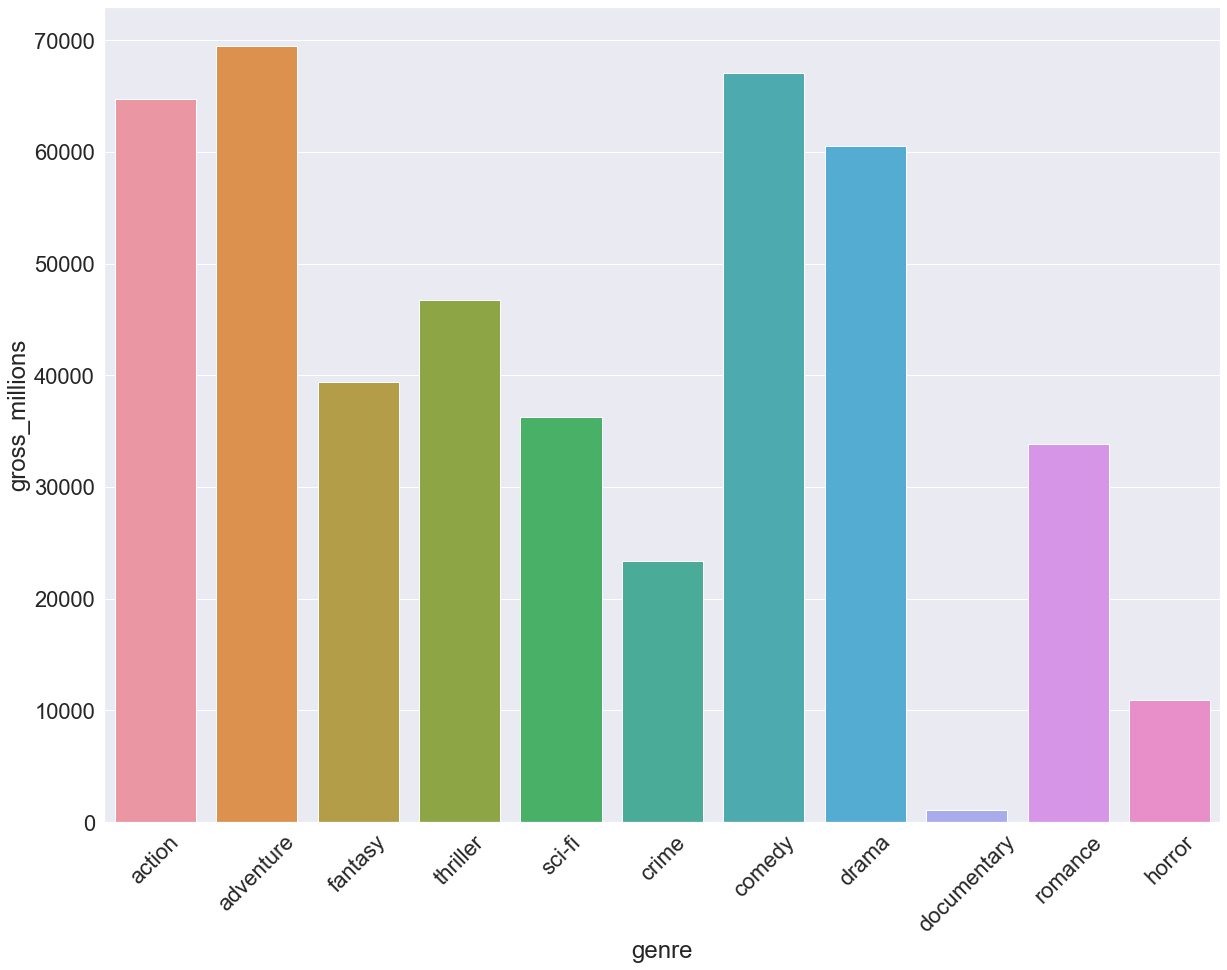

In [17]:
genre_sum_gross = sns.barplot(x= genre_sum.index, y="gross_millions", data=genre_sum)
genre_sum_gross.set_xticklabels(genre_sum_gross.get_xticklabels(),rotation=45)
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2)
plt.savefig('genre_sum_gross.png')

# comedy and drama have high total gross earnings, despite moderate avg. gross earnings

#### Total budget by genre

[Text(0, 0, 'action'),
 Text(0, 0, 'adventure'),
 Text(0, 0, 'fantasy'),
 Text(0, 0, 'thriller'),
 Text(0, 0, 'sci-fi'),
 Text(0, 0, 'crime'),
 Text(0, 0, 'comedy'),
 Text(0, 0, 'drama'),
 Text(0, 0, 'documentary'),
 Text(0, 0, 'romance'),
 Text(0, 0, 'horror')]

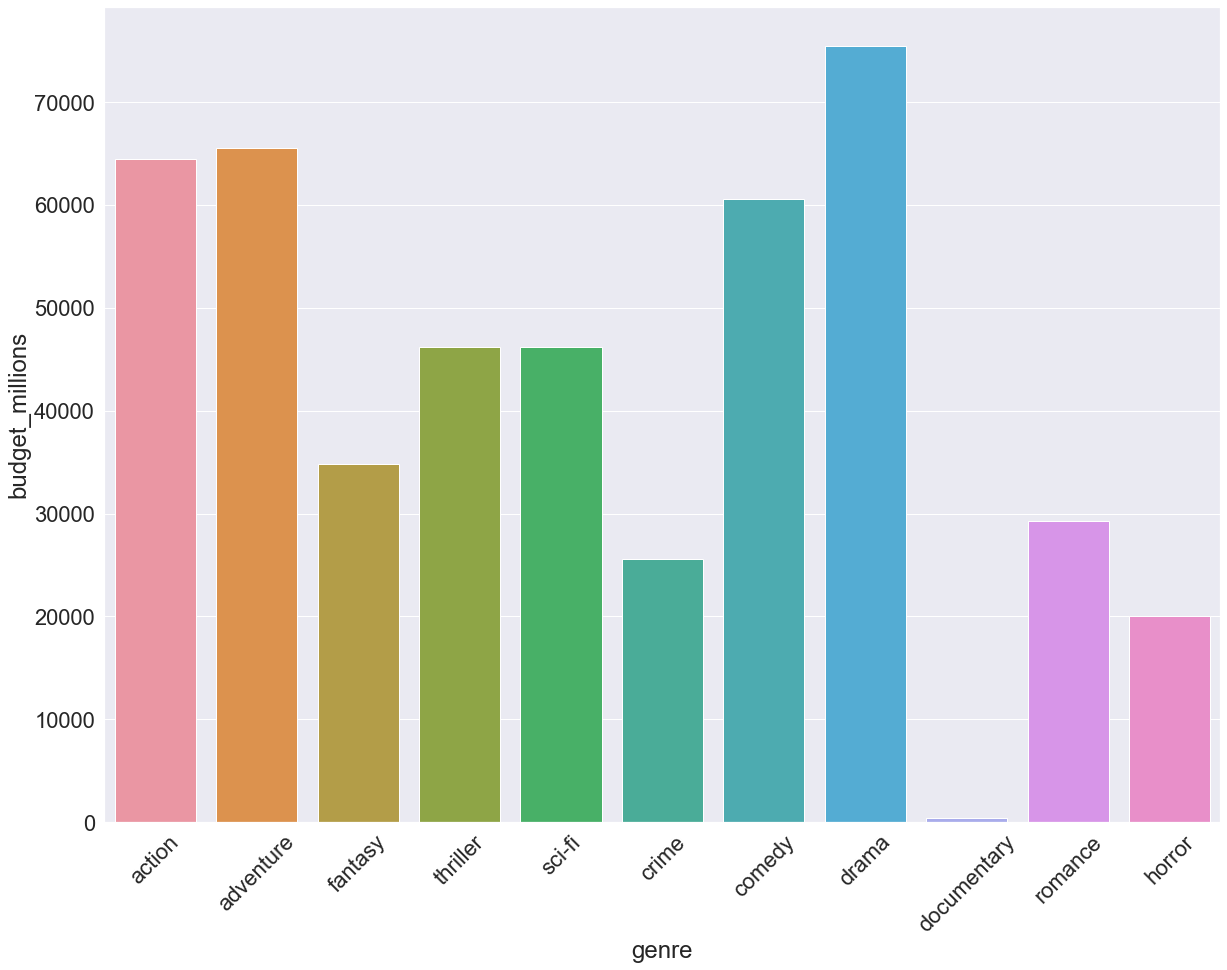

In [18]:
genre_sum_budget = sns.barplot(x= genre_sum.index, y="budget_millions", data=genre_sum)
genre_sum_budget.set_xticklabels(genre_sum_budget.get_xticklabels(),rotation=45)

#### Total revenue by genre

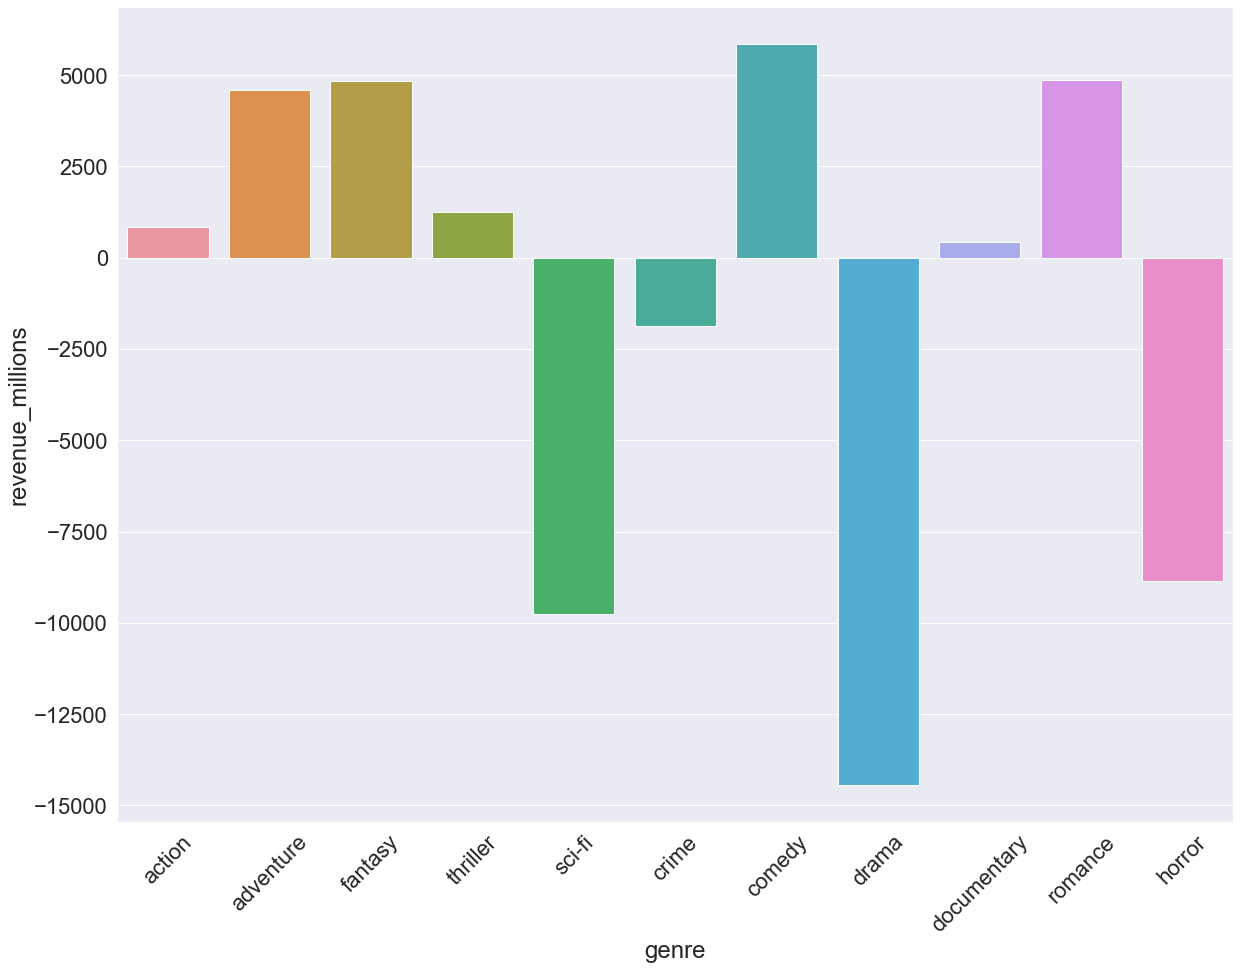

In [19]:
genre_sum_revenue = sns.barplot(x= genre_sum.index, y="revenue_millions", data=genre_sum)
genre_sum_revenue.set_xticklabels(genre_sum_revenue.get_xticklabels(),rotation=45)
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2)
plt.savefig('genre_sum_revenue.png')

# sci-fi, drama, and horror movies lose money overall
# comedy and romance have high total revenue, despite low avg. revenue